# Using Pandas to Import your data

In this section we will using Pandas to import CSV data from Google Analytics, Google Search Concole, AdWords, Facebook Ads as well as a site visability and keyword ranking reports and accessing a API for trend analysis.

## About the data in the course 

In this course we'll be using CSV from popular web analytics platforms. Some of the data is perfect and ready to use other data will need to be preprocessed. We will need to fix a few problems:

<ul>
<li>Drop uncecessary Series (Columns)</li>    
<li>Replace NaN (missing values)</li>
<li>Replace values</li>
<li>Fix incorrectly recoreded Google Analytics Page data</li>
<li>Reformat timeseries data in Google Analytics</li>
</ul>


## Libraries Needed

In [57]:
import pandas as pd # Lodad the pandas library
from pytrends.request import TrendReq # Load PyTrends library for accessing Google Trends
#https://github.com/GeneralMills/pytrends 
%matplotlib inline

## Importing and Basic Visualisation in Google Analytics CSV's 

In [58]:
#import Google Analytics data
ga_data = pd.read_csv('data/ga_data/ga_keyword.csv')

In [59]:
ga_data.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,# Miratrix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# Channels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 20180831-20190831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importing Google Analytics CSV files properly

Here I'll show you how to manage Google Analytics CSV files so that you can look at the different types of data needed for analysis

In [60]:
#Import google analytics keyword data
ga_kw_data = pd.read_csv('data/ga_data/ga_keyword.csv', skiprows=6, nrows=5)
ga_kw_traffic_data = pd.read_csv('data/ga_data/ga_keyword.csv', skiprows=14, nrows=366,
                                 parse_dates=['Day Index'])

In [61]:
ga_kw_data.head()

,Keyword,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,(not provided),615,591,727,35.90%,1.75,00:01:42,0.00%,0,£0.00
1,amazon,3,3,3,100.00%,1.00,00:00:00,0.00%,0,£0.00
2,(not set),1,1,1,100.00%,1.00,00:00:00,0.00%,0,£0.00
3,miratrix,1,1,1,0.00%,2.00,00:11:37,0.00%,0,£0.00
4,miratrix london,1,1,1,0.00%,1.00,00:05:27,0.00%,0,£0.00


In [62]:
ga_kw_traffic_data.head()

,Day Index,Users,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2018-08-31,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-02,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-03,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-04,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Import google analytics pages data
ga_page_data = pd.read_csv('data/ga_data/ga_pages.csv', skiprows=6, nrows=376)
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv', skiprows=386, nrows=367,
                                   parse_dates=['Day Index'])

In [64]:
ga_page_data.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,813,665,00:02:05,641,14.35%,55.97%,£0.00
1,/www.miratrix.co.uk,515,388,00:02:17,373,59.25%,56.89%,£0.00
2,/get-in-touch/,336,163,00:01:06,23,10.53%,33.04%,£0.00
3,/app-marketing-agency/,140,120,00:02:04,73,18.31%,57.86%,£0.00
4,/app-store-optimization-services/,136,105,00:01:30,22,14.29%,47.79%,£0.00


In [65]:
ga_page_traffic_data.head()

,Day Index,Pageviews,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018-08-31,14,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-02,17,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-03,14,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-04,11,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#Import google analytics refers data
ga_ref_data = pd.read_csv('data/ga_data/ga_refering_sites.csv', skiprows=6, nrows=10)
ga_ref_traffic_data = pd.read_csv('data/ga_data/ga_refering_sites.csv', skiprows=18,
                                  nrows=366, parse_dates=['Day Index'])

In [67]:
ga_ref_data.head()

,Source,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,brightonseo.com,25,25,31,0.00%,1.42,00:01:08,0.00%,0,£0.00
1,clutch.co,24,23,31,54.84%,1.58,00:01:04,0.00%,0,£0.00
2,yell.com,5,5,7,0.00%,1.86,00:00:24,0.00%,0,£0.00
3,free-website-traffic.com,4,4,4,25.00%,2.25,00:00:36,0.00%,0,£0.00
4,growthbug.com,4,4,6,0.00%,1.17,00:05:15,0.00%,0,£0.00


In [68]:
ga_ref_traffic_data.head()

,Day Index,Users
0,2018-08-31,0
1,2018-09-01,0
2,2018-09-02,0
3,2018-09-03,0
4,2018-09-04,1


In [69]:
#Import google analytics social data
ga_social_data = pd.read_csv('data/ga_data/ga_social_data.csv', skiprows=5, nrows=7)
ga_social_traffic_data = pd.read_csv('data/ga_data/ga_social_data.csv', skiprows=15, nrows=366, parse_dates=['Day Index'])

In [70]:
ga_social_data.head()

,Social Network,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,Facebook,29,29,29,37.93%,1.00,<00:00:01,0.00%,0,£0.00
1,Twitter,6,4,7,0.00%,2.14,00:04:50,0.00%,0,£0.00
2,reddit,2,2,2,100.00%,1.00,00:00:00,0.00%,0,£0.00
3,LinkedIn,1,1,1,100.00%,1.00,00:00:00,0.00%,0,£0.00
4,LiveJournal,1,1,1,0.00%,1.00,00:00:00,0.00%,0,£0.00


In [71]:
ga_social_traffic_data.head()

,Day Index,Users
0,2018-08-31,0
1,2018-09-01,0
2,2018-09-02,0
3,2018-09-03,0
4,2018-09-04,0


In [72]:
#Import google analytics other data
ga_other_data = pd.read_csv('data/ga_data/ga_other.csv', skiprows=6, nrows=5)
ga_other_traffic_data = pd.read_csv('data/ga_data/ga_other.csv', skiprows=13,
                                    nrows=366, parse_dates=['Day Index'])

In [73]:
ga_other_data.head()

,Source,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,directory,116,110,143,18.18%,2.14,00:02:34,0.00%,0,£0.00
1,google_business,35,35,36,16.67%,1.81,00:02:00,0.00%,0,£0.00
2,nav,26,0,43,6.98%,2.40,00:04:04,0.00%,0,£0.00
3,companyemail,16,12,23,43.48%,1.65,00:00:59,0.00%,0,£0.00
4,Clickky DevTools Listing,3,3,3,0.00%,2.67,00:01:45,0.00%,0,£0.00


In [74]:
ga_other_traffic_data.head()

,Day Index,Users
0,2018-08-31,1
1,2018-09-01,0
2,2018-09-02,1
3,2018-09-03,1
4,2018-09-04,0


In [75]:
#Import google analytics total data
ga_total_data = pd.read_csv('data/ga_data/ga_total_channels.csv', skiprows=6, nrows=5)
ga_total_traffic_data = pd.read_csv('data/ga_data/ga_total_channels.csv', skiprows=13,
                                    nrows=366, parse_dates=['Day Index'])

In [76]:
ga_total_data.head()

,Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Contact From Good Lead (Goal 1 Conversion Rate),Contact From Good Lead (Goal 1 Completions),Contact From Good Lead (Goal 1 Value)
0,Organic Search,622,598,734,36.10%,1.75,00:01:43,0.00%,0,£0.00
1,Direct,601,599,665,57.74%,1.37,00:00:42,0.00%,0,£0.00
2,(Other),194,160,248,18.15%,2.10,00:02:35,0.00%,0,£0.00
3,Referral,100,88,144,23.61%,3.85,00:02:54,2.08%,3,£0.00
4,Social,41,39,42,35.71%,1.19,00:00:49,0.00%,0,£0.00


In [77]:
ga_total_traffic_data.head()

,Day Index,Users
0,2018-08-31,5
1,2018-09-01,4
2,2018-09-02,5
3,2018-09-03,7
4,2018-09-04,7


## Importing Google Search Console CSV's

In [78]:
#Importing query data from Google Search Console
gsc_query = pd.read_csv('data/gsc_data/gsc_query.csv')

In [79]:
gsc_query.head()

,Query,Clicks,Impressions,CTR,Position
0,miratrix,71,760,9.34%,6.23
1,app marketing agency uk,23,398,5.78%,3.36
2,mobile marketing agency london,11,2529,0.43%,3.97
3,app marketing uk,9,261,3.45%,2.01
4,app marketing agency,7,9860,0.07%,39.21


In [80]:
#Importing pages data from Google Search Console
gsc_page = pd.read_csv('data/gsc_data/gsc_pages.csv')

In [81]:
gsc_page.head()

,Page,Clicks,Impressions,CTR,Position
0,https://miratrix.co.uk/,371,100673,0.37%,42.59
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64
3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05
4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61


In [82]:
#Importing country data from Google Search Console
gsc_country = pd.read_csv('data/gsc_data/gsc_country.csv')

In [83]:
gsc_country.head()

,Country,Clicks,Impressions,CTR,Position
0,United Kingdom,310,18836,1.65%,48.67
1,India,97,25622,0.38%,51.38
2,United States,29,14493,0.2%,45.92
3,Germany,14,2516,0.56%,55.01
4,France,12,2167,0.55%,43.88


In [84]:
#Importing Device data from Google Search Console
gsc_device = pd.read_csv('data/gsc_data/gsc_device.csv')

In [85]:
gsc_device.head()

,Device,Clicks,Impressions,CTR,Position
0,Desktop,508,131897,0.39%,47.79
1,Mobile,105,31591,0.33%,36.65
2,Tablet,6,970,0.62%,39.56


In [86]:
#Importing query apperance from Google Search Consoleb
gsc_apperance = pd.read_csv('data/gsc_data/gsc_apperance.csv')

In [87]:
gsc_apperance.head()

,Search Appearance,Clicks,Impressions,CTR,Position
0,Web Light results,0,14,0%,7.5


## Importing Adwords PPC CSV 

In [88]:
#Import PPC data
ppc_data = pd.read_csv('data/other_data/ppc_data.csv')

In [35]:
ppc_data.head()

,Unnamed: 0,Day,Ad group,Avg. CPC,CTR,Campaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Final URL,Impr.,Keyword,Keyword status,Max. CPC,Mobile final URL,Status
0,0,2018-08-31,miratrix_ppc_adgroup,2.490563,16.894144,miratrix_ppc,75,0.225225,1,1105.809783,1105.809783,Text,7501,keyword,Active,2.6,Text,Active
1,1,2018-09-01,miratrix_ppc_adgroup,2.472161,5.976134,miratrix_ppc,17,1.193317,5,1035.835572,207.167114,Text,2504,keyword,Active,2.6,Text,Active
2,2,2018-09-02,miratrix_ppc_adgroup,2.508561,6.824919,miratrix_ppc,3,0.107411,1,2335.470042,2335.470042,Text,6354,keyword,Active,2.6,Text,Active
3,3,2018-09-03,miratrix_ppc_adgroup,2.548919,8.058366,miratrix_ppc,99,2.723735,7,655.072102,93.581729,Text,2071,keyword,Active,2.6,Text,Active
4,4,2018-09-04,miratrix_ppc_adgroup,2.414868,6.884937,miratrix_ppc,93,1.464435,7,1154.306794,164.900971,Text,3291,keyword,Active,2.6,Text,Active


## Importing Facebook Ad CSV

In [36]:
#Import Facebook ad data
fb_data = pd.read_csv('data/other_data/facebook-data-ads.csv',
                      parse_dates=['Reporting starts','Reporting ends'])

In [37]:
fb_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Importing  Competitor Site Visability CSV

In [38]:
#import site vsiability csv
site_visibility = pd.read_csv('data/other_data/site_visibility.csv')

In [39]:
site_visibility.head()

,Day Index,apptamin.com,miratrix.co.uk
0,2018-08-31,35.354169,79.576190
1,2018-09-01,97.529284,45.990192
2,2018-09-02,8.643297,63.922349
3,2018-09-03,19.927875,54.022379
4,2018-09-04,47.617416,57.075055


## Import keyword rank tracking data CSV

In [40]:
ranking_data = pd.read_csv('data/other_data/ranking_data.csv')

In [41]:
ranking_data.head()

,Day Index,app competitor analysis,app marketing agency,app marketing agency london,app marketing agency uk,app marketing uk,app store optimisation agency,aso audit,mobile advertising agency,mobile advertising agency london,mobile app marketing agency,mobile marketing agency,mobile marketing agency london,mobile marketing services uk
0,2018-08-31,6,1,6,10,21,20,17,26,0,21,23,9,1
1,2018-09-01,21,5,12,8,1,28,12,16,18,7,0,7,7
2,2018-09-02,22,7,14,29,19,16,14,10,10,28,10,4,6
3,2018-09-03,28,28,29,23,0,10,11,8,27,21,3,11,27
4,2018-09-04,14,14,26,17,11,26,13,17,11,22,8,28,0


In [42]:
ranking_data[['Day Index','app competitor analysis']].head()

,Day Index,app competitor analysis
0,2018-08-31,6
1,2018-09-01,21
2,2018-09-02,22
3,2018-09-03,28
4,2018-09-04,14


## How to import Google Trends data via an API 

In this section we're going to see how to use an opensource API to gather data that we can use in our strategic analysis. <b>IMPORTANT:</b> Curretnly this API will only work with `pandas .23.4`. This will change in the future. https://github.com/GeneralMills/pytrends thanks for General Mills for creating this handy repository.

In [43]:
#Lets create a variable that stores the API settings
pytrends = TrendReq(hl='en-GB', 
                    tz=360, #timezone
                    timeout=(10,25),#time out after afew seconts
                    retries=2, #retries 2 times
                    backoff_factor=0.1) #stops after a few attempts

In [44]:
#Create a list with 5 keywords you'd like to investigate
kw_list = ["seo audit", "aso audit", "app marketing agency","seo agency", "aso agency"]

It's possible to change the category, locations, regions. You can find your category here https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

In [45]:
#Pass your variables over to Google Trends
pytrends.build_payload(kw_list, #keywords to lookup
                       cat=83, #category to look in
                       timeframe='today 5-y', #timeframe
                       geo='', #country
                       gprop='')#region

In [46]:
#Convert the trends data to a Pandas DataFrame.
trends_data = pytrends.interest_over_time()

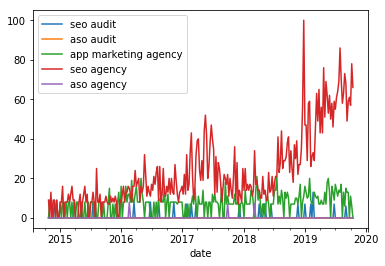

In [47]:
trends_data.plot()

## Basic Visualisations in Pandas

In this section you'll be visualising the data we loaded previously in this notebook using Pandas built in `plot.()` function. The function helps you create visualisations of simple data quickly without the need to load other libraries.

### Visualisation Google Analytics Data

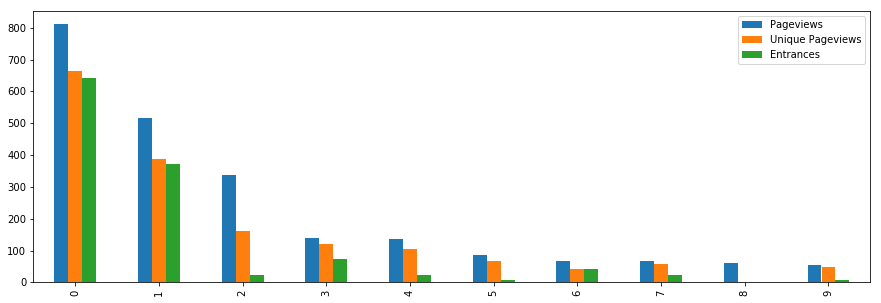

In [48]:
#Visualise page data using a bar chart sort the chart by pageviews
ga_page_data[:10].sort_values(by='Pageviews', ascending=False).plot.bar(figsize=(15,5))

### Visualisting Google Search Console data 

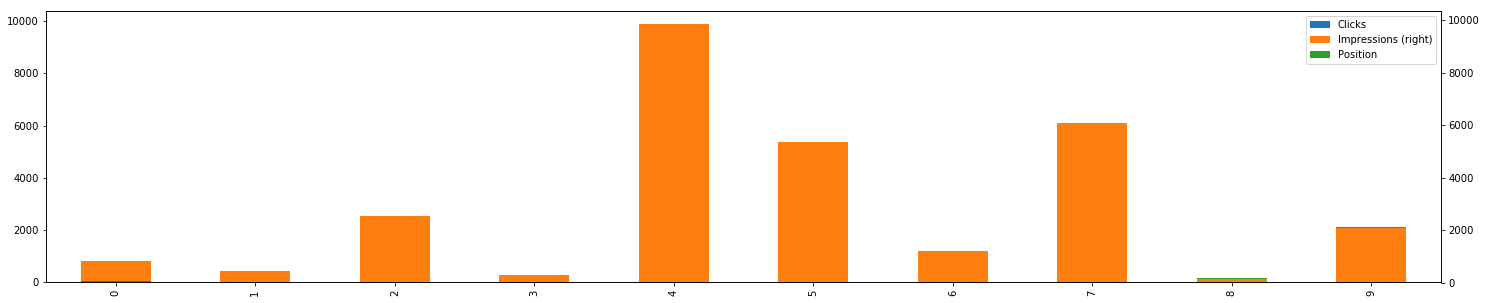

In [49]:
#Plot another bar chart, give it a secondary y axes as Impressions and stack the bar chart
gsc_query[:10].plot.bar(figsize=(25,5), secondary_y="Impressions",  stacked=True)

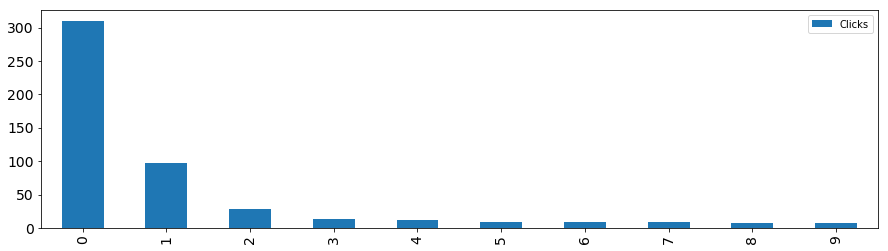

In [50]:
#Plot another bar chart but this time increase the font size
gsc_country[['Country','Clicks']][:10].plot.bar(figsize=(15,4), fontsize=14)

### Visualising Adwords PPC data 

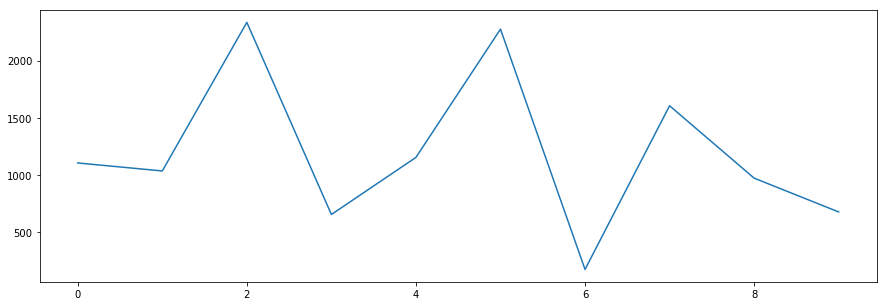

In [51]:
ppc_data['Cost'][:10].plot(kind='line', figsize=(15,5))

### Visualising Facebook Ads data 

In [52]:
fb_data.head()

,Unnamed: 0,Reporting starts,Reporting ends,Campaign name,Delivery,Mobile app installs,Mobile app actions,Cost per mobile app install (GBP),Cost per mobile app action (GBP),Desktop app installs,Desktop app engagement,Cost per desktop app install (GBP),Cost per desktop app engagement (GBP),Post reactions,Post comments,Post shares
0,0,2014-02-21,2018-01-29,Campaign1,0,11451.0,NaN,1.275683,NaN,NaN,NaN,NaN,NaN,1807.0,42.0,133.0
1,1,2015-12-04,2015-12-04,Campaign2,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2,2015-10-21,2015-10-21,Campaign3,inactive,2.0,NaN,3.530000,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,3,2015-10-20,2015-10-20,Campaign3,inactive,2.0,NaN,16.500000,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2015-10-20,2015-10-20,Campaign4,inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


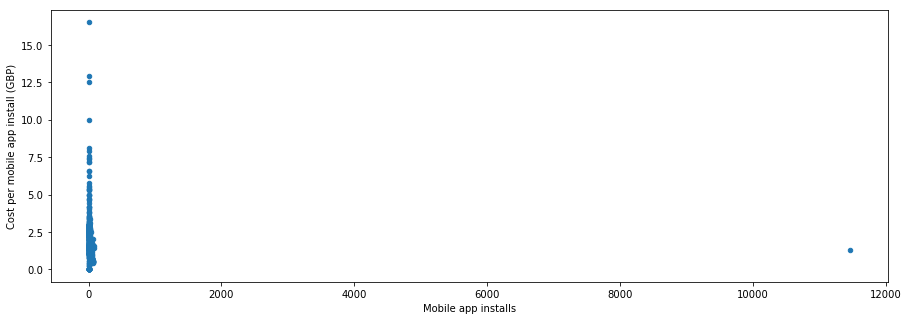

In [53]:
#Scatter charts are useful to look for relationship patterns, create on between two metrics
fb_data.plot.scatter(x='Mobile app installs',
                     y='Cost per mobile app install (GBP)',figsize=(15,5))

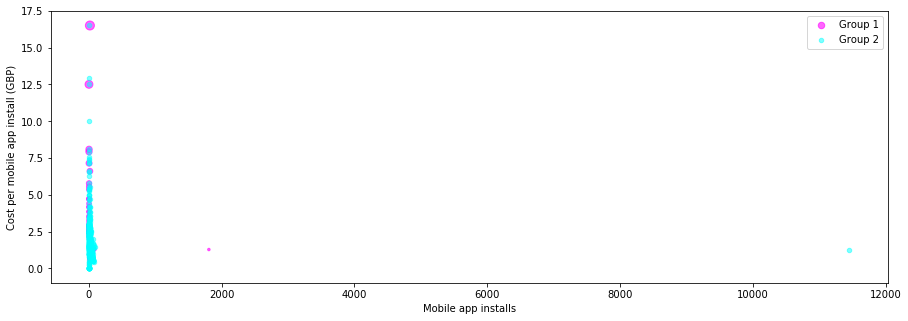

In [54]:
#Plot two scatter graphs on top of each other and format it
ax = fb_data.plot.scatter(x='Post reactions',y='Cost per mobile app install (GBP)', 
                          color='Magenta', label='Group 1', 
                          alpha=.6, s=fb_data['Cost per mobile app install (GBP)']*5,
                          figsize=(15,5))
fb_data.plot.scatter(x='Mobile app installs',y='Cost per mobile app install (GBP)', 
                     color='Cyan', 
                     label='Group 2', ax=ax, alpha=.5,
                     figsize=(15,5))

### Visualising Google Trend data 

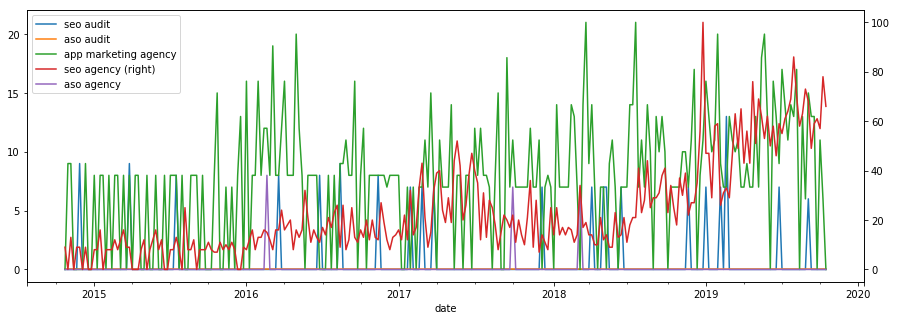

In [55]:
#Plot a line graph with a secondary y of the largest value
trends_data.plot(secondary_y=('seo agency'), figsize=(15,5))

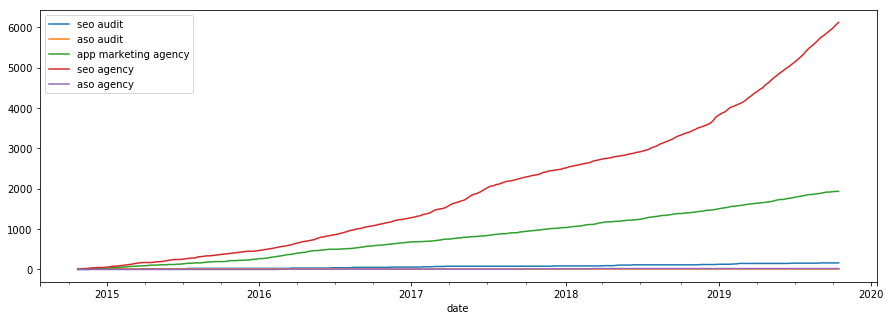

In [56]:
#Now plot a chart of the cummulative sum of all the data
trends_data.cumsum().plot(figsize=(15,5))